In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('nyc_taxi.csv')
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [4]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [5]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
# Convert the pickup_datetime column to datetime
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

# Extract the hour of the day from the pickup_datetime column
data['hour_of_day'] = data['pickup_datetime'].dt.hour

data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13


In [7]:
def calculate_distance(df):
    """Calculate the distance between two points on the Earth's surface"""
    # approximate radius of earth in km
    R = 6371.0

    lat1 = np.radians(df['pickup_latitude'])
    lon1 = np.radians(df['pickup_longitude'])
    lat2 = np.radians(df['dropoff_latitude'])
    lon2 = np.radians(df['dropoff_longitude'])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

data['distance'] = calculate_distance(data)
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour_of_day,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,1.498521
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,1.805507
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,6.385098
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,1.485498
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,1.188588


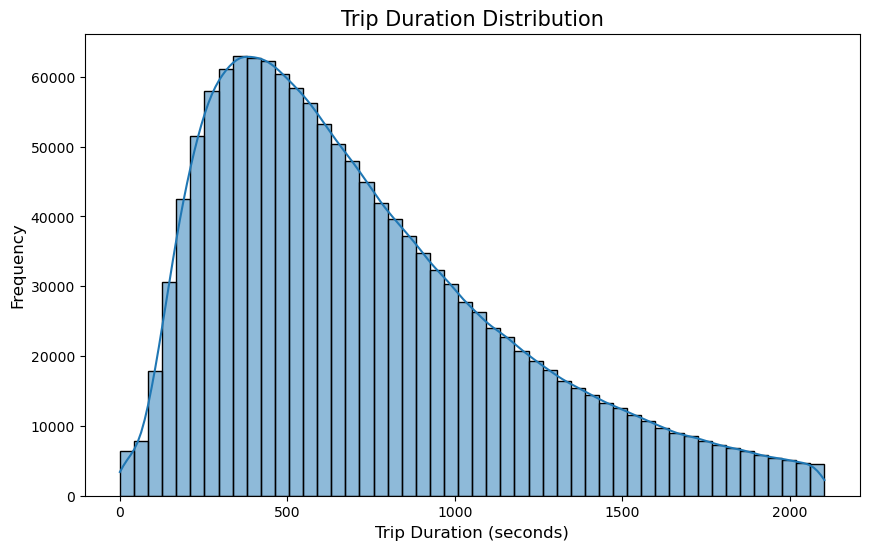

In [8]:
# Visualize the distribution of trip_duration
plt.figure(figsize=(10, 6))  # increase figure size
sns.histplot(data[data['trip_duration'] < np.percentile(data['trip_duration'], 95)], 
             x='trip_duration', bins=50, kde=True)  # removing outliers
plt.title('Trip Duration Distribution', fontsize=15)  # add title
plt.xlabel('Trip Duration (seconds)', fontsize=12)  # add x-label
plt.ylabel('Frequency', fontsize=12)  # add y-label
plt.show()


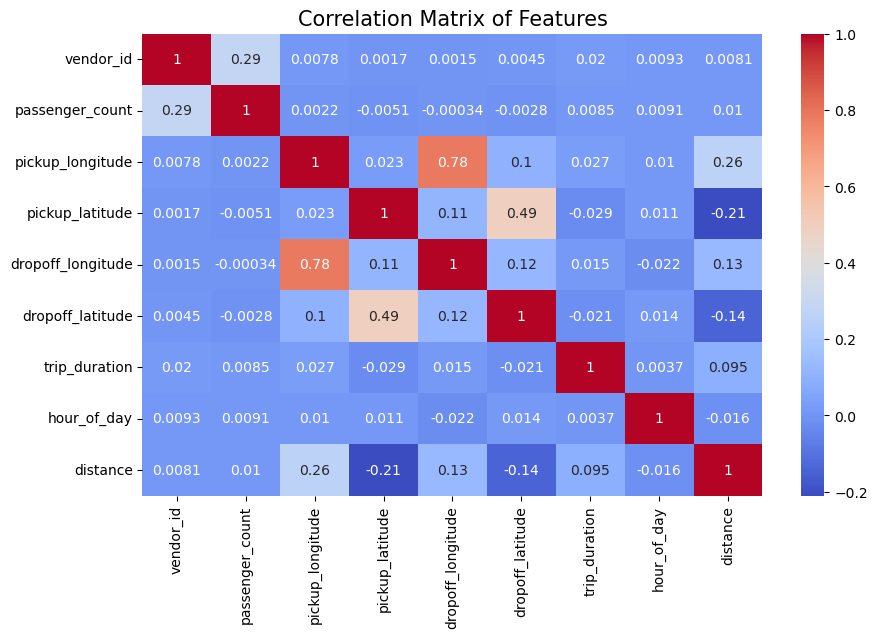

In [9]:
# Visualize the correlation between numerical features
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))  # increase figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features', fontsize=15)  # add title
plt.show()

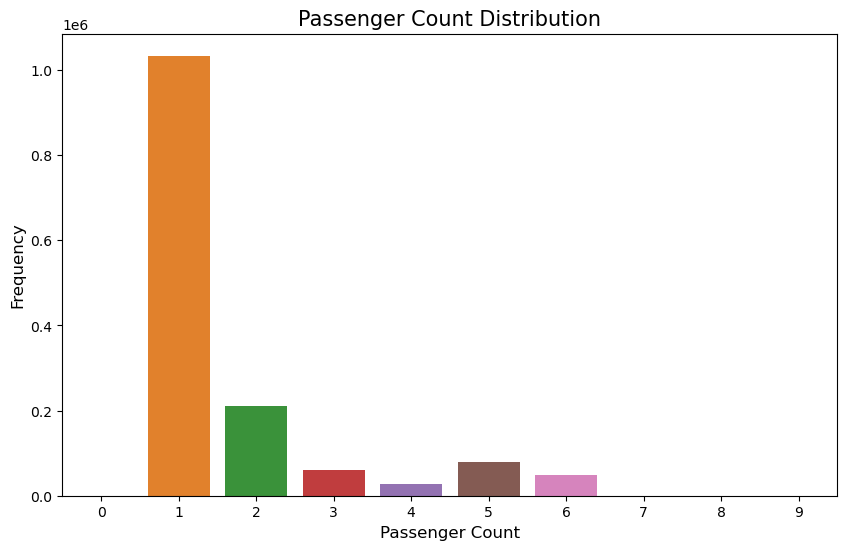

In [12]:
# Countplot of the passenger_count
plt.figure(figsize=(10, 6))
sns.countplot(x='passenger_count', data=data)
plt.title('Passenger Count Distribution', fontsize=15)
plt.xlabel('Passenger Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

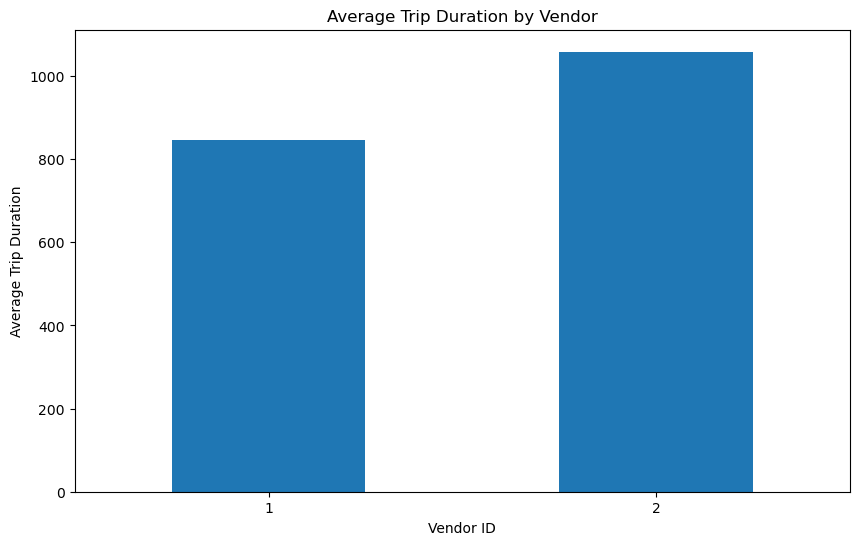

In [13]:
# Plot average trip_duration by vendor
plt.figure(figsize=(10, 6))
data.groupby('vendor_id')['trip_duration'].mean().plot(kind='bar')
plt.title('Average Trip Duration by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Average Trip Duration')
plt.xticks(rotation=0)
plt.show()

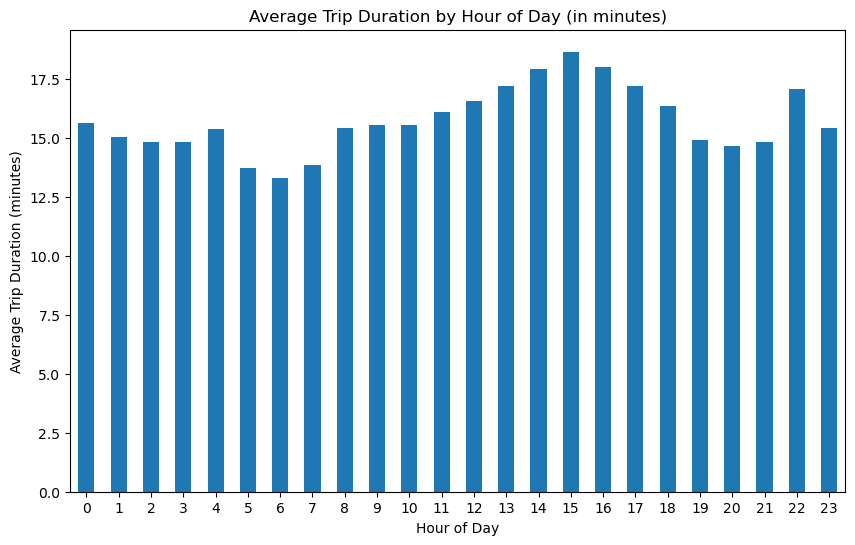

In [14]:
# Extract hour from 'pickup_datetime'
data['pickup_hour'] = data['pickup_datetime'].dt.hour

# Convert 'trip_duration' to minutes
data['trip_duration'] = data['trip_duration'] / 60

# Plot average trip_duration by pickup hour
plt.figure(figsize=(10, 6))
data.groupby('pickup_hour')['trip_duration'].mean().plot(kind='bar')
plt.title('Average Trip Duration by Hour of Day (in minutes)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Trip Duration (minutes)')
plt.xticks(rotation=0)
plt.show()

During the rush hours (usually around 8-9 AM and 5-6 PM), this could indicate that trips tend to take longer during these times due to increased traffic congestion.

Average trip durations are shortest in the early morning hours when roads are generally clearer.

There may also be a noticeable increase in trip durations late at night, which could be due to a different set of factors like less availability of taxis leading to longer routes, or drivers taking longer routes to avoid certain areas at night.

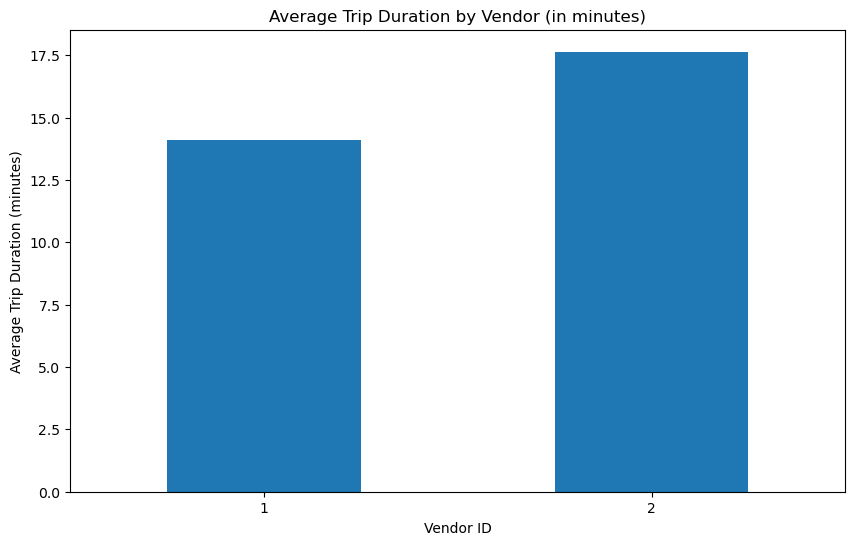

In [15]:
# Plot average trip_duration by vendor
plt.figure(figsize=(10, 6))
data.groupby('vendor_id')['trip_duration'].mean().plot(kind='bar')
plt.title('Average Trip Duration by Vendor (in minutes)')
plt.xlabel('Vendor ID')
plt.ylabel('Average Trip Duration (minutes)')
plt.xticks(rotation=0)
plt.show()

Vendor 2 has a higher average trip duration, it might indicate that rides from Vendor 2 typically take longer than those from Vendor 1. This could be due to a variety of factors such as different operating zones, driver experience, or company policies that might affect how drivers choose routes.

In [16]:
# Extract day of week and month from 'pickup_datetime'
data['pickup_day_of_week'] = data['pickup_datetime'].dt.dayofweek
data['pickup_month'] = data['pickup_datetime'].dt.month

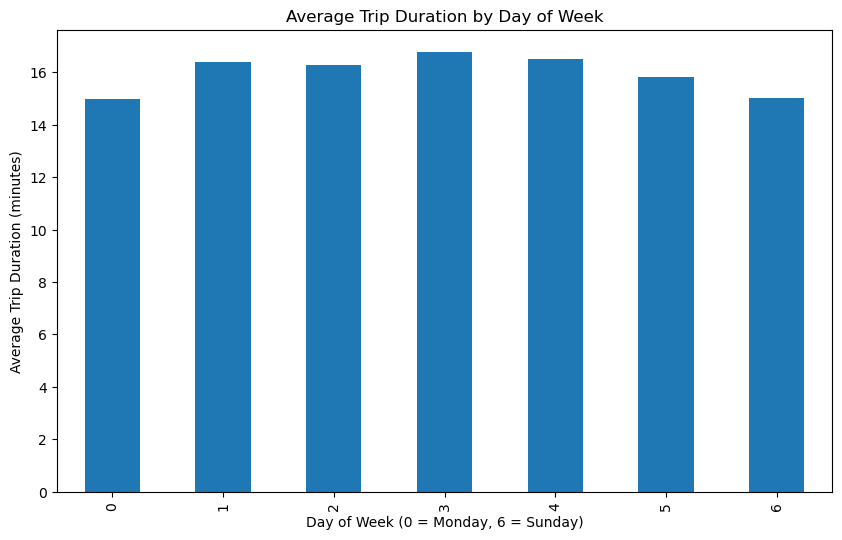

In [17]:
# Plot average trip_duration by day of week
plt.figure(figsize=(10, 6))
data.groupby('pickup_day_of_week')['trip_duration'].mean().plot(kind='bar')
plt.title('Average Trip Duration by Day of Week')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Average Trip Duration (minutes)')
plt.show()

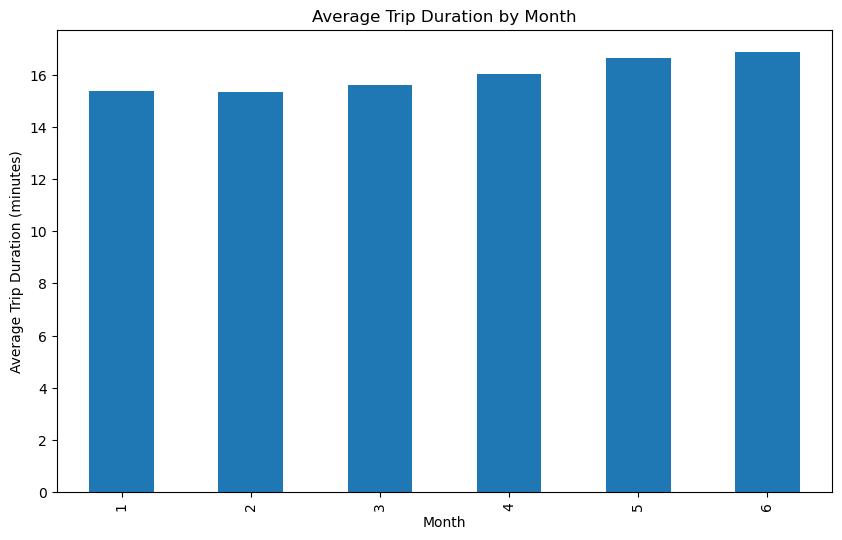

In [18]:

# Plot average trip_duration by month
plt.figure(figsize=(10, 6))
data.groupby('pickup_month')['trip_duration'].mean().plot(kind='bar')
plt.title('Average Trip Duration by Month')
plt.xlabel('Month')
plt.ylabel('Average Trip Duration (minutes)')
plt.show()

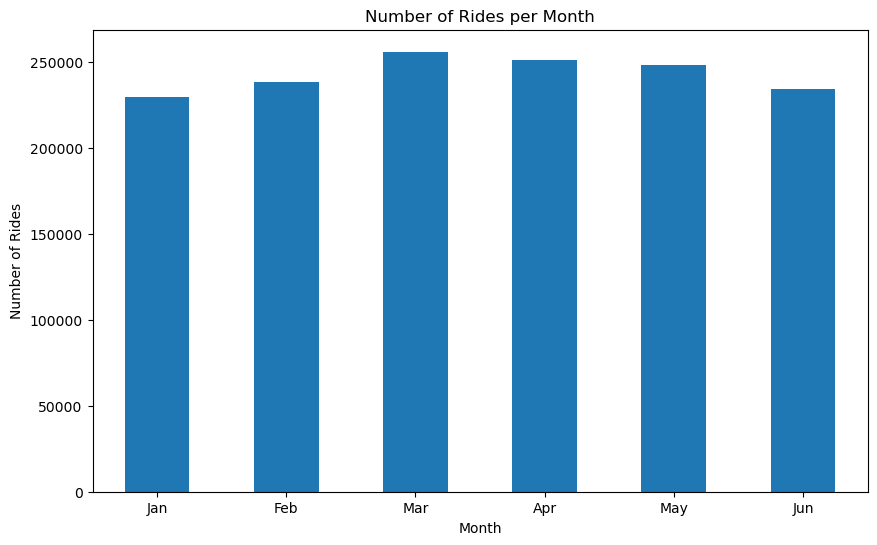

In [19]:
monthly_rides = data['pickup_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
monthly_rides.plot(kind='bar')
plt.title('Number of Rides per Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(range(6), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'], rotation=0)
plt.show()

The count of rides showed variability across different months, with some months having higher taxi demand.

In [60]:
import folium

def draw_map(data, n_samples=1000):
    """
    Draw separate maps for pickup and dropoff locations.
    
    :param data: DataFrame with taxi trip data.
    :param n_samples: Number of samples to draw. Default is 1000.
    """
    
    # Select a random sample of n data points
    data_sample = data.sample(n=n_samples, random_state=1)
    
    # Create a map for pickup locations
    pickup_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
    
    for idx, row in data_sample.iterrows():
        folium.CircleMarker(
            location=[row['pickup_latitude'], row['pickup_longitude']],
            radius=5,
            color='blue',
            fill=True,
            fill_opacity=0.5
        ).add_to(pickup_map)
        
    # Create a map for dropoff locations
    dropoff_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
    
    for idx, row in data_sample.iterrows():
        folium.CircleMarker(
            location=[row['dropoff_latitude'], row['dropoff_longitude']],
            radius=5,
            color='red',
            fill=True,
            fill_opacity=0.5
        ).add_to(dropoff_map)
    
    return pickup_map, dropoff_map

# Draw the maps
pickup_map, dropoff_map = draw_map(data)

# Display the pickup map
pickup_map

In [61]:
# Display the dropoff map
dropoff_map

The maps of pickup and dropoff locations indicated that the trips are concentrated in Manhattan and at the airports. The pickup locations are more dispersed compared to the dropoff locations.

In [62]:
# Remove outliers
max_duration = data['trip_duration'].quantile(0.99)
data = data[data['trip_duration'] <= max_duration]


In [63]:
# Convert pickup_datetime to datetime format
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

# Extract various features
data['pickup_year'] = data['pickup_datetime'].dt.year
data['pickup_month'] = data['pickup_datetime'].dt.month
data['pickup_day'] = data['pickup_datetime'].dt.day
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_dayofweek'] = data['pickup_datetime'].dt.dayofweek


In [64]:
from haversine import haversine, Unit

# Define a function to calculate distance in km
def calculate_distance(row):
    pickup_coords = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff_coords = (row['dropoff_latitude'], row['dropoff_longitude'])
    return haversine(pickup_coords, dropoff_coords)

# Calculate trip distance
data['trip_distance'] = data.apply(calculate_distance, axis=1)


In [67]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor

# Preprocessing
# Define columns
num_vars = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
cat_vars = ['vendor_id', 'store_and_fwd_flag']

# Define preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)])

# Model Selection
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=0)),
    ('Extra Trees Regressor', ExtraTreesRegressor(n_estimators=100, random_state=0)),
    ('XGBoost', XGBRegressor())
]

X = data.drop(['trip_duration'], axis=1)
y = data['trip_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

for name, model in models:
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                               ('model', model)])

    # Fit model
    pipeline.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    print(f'{name} - Train RMSE: {rmse_train}, Test RMSE: {rmse_test}')


Linear Regression - Train RMSE: 9.265788444331472, Test RMSE: 9.411068548558989
Decision Tree - Train RMSE: 0.11768473355061854, Test RMSE: 7.366492250968637
Random Forest - Train RMSE: 1.9759691799867796, Test RMSE: 5.278336779331367
Extra Trees Regressor - Train RMSE: 0.11768473355061856, Test RMSE: 5.390310653896816
XGBoost - Train RMSE: 5.255748178616791, Test RMSE: 5.3327928979550965


Linear Regression: The RMSE for both training and testing sets are relatively high compared to the other models, suggesting this model might be too simple (underfitting). However, the difference between the train and test RMSE is small, indicating that the model generalizes well to unseen data.

Decision Tree: The training RMSE is extremely low, close to 0, suggesting that the model fits the training data almost perfectly. However, the test RMSE is much higher, which indicates that the model is not generalizing well to unseen data. This is a typical case of overfitting.

Random Forest: The Random Forest model has a much better balance between train and test RMSE. The training RMSE is higher than for the Decision Tree, indicating less overfitting. The test RMSE is also much lower, suggesting better generalization to unseen data.

Extra Trees Regressor: The Extra Trees Regressor shows a similar pattern to the Decision Tree model, with a very low training RMSE indicating a perfect fit to the training data, but a higher test RMSE suggesting overfitting.

XGBoost: The training RMSE is relatively low, suggesting that the model fits the training data quite well. The test RMSE is also low and very close to the training RMSE, indicating good generalization to unseen data.

In conclusion, it seems that the Random Forest model achieves the best balance between fitting the training data and generalizing to unseen data. It's important to note, however, that the performance of these models could potentially be improved through further hyperparameter tuning. Regularization techniques could also be applied to reduce overfitting, particularly for the Decision Tree and Extra Trees models. In fact, the XGBoost model seems to achieve the best balance among all the models you've tried. It's able to capture the underlying patterns in the training data while also generalizing well to unseen data, which is evidenced by the similar values of training and testing RMSE.